## Watershed and MeanShift Segmentation

You should run Cell 1 to define functions prior to running the following cells.

Please allow a few seconds time for Cell 2 and 3 to perform it's work.

In [4]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Watershed function from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html
def water_shed(filename):
    color = cv2.imread(filename)
    image = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
    distance = ndi.distance_transform_edt(image)
    local_maxi = peak_local_max(distance, indices=False, labels=image)
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=image)
    return labels

# Mean Shift function from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
def mean_shift(filename):
    dim = (480, 320)
    image1 = cv2.imread(filename)
    image1 = cv2.resize(image1, dim)
    image1_r = image1[:, :, 0].flatten()
    image1_g = image1[:, :, 1].flatten()
    image1_b = image1[:, :, 2].flatten()
    image1_list = [image1_b, image1_g, image1_r]
    X = np.stack(image1_list).transpose()
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    
    # needs to transpose the image for best results
    image1_labels = np.zeros(dim)
    for i in range(dim[0]):
        for j in range(dim[1]):
            image1_labels[i][j] = labels[i + j * dim[0]]

    transposed = image1_labels.transpose()
    return transposed

We now perform both algorithms on imgQ41.jpg.

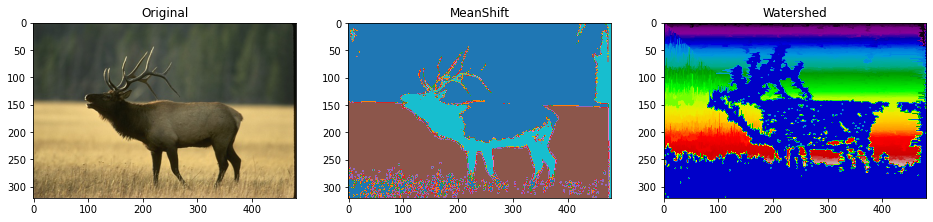

In [5]:
p1 = plt.imread("imgQ41.jpg")
ms1 = mean_shift("imgQ41.jpg")
ws1 = water_shed("imgQ41.jpg")
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.gca().set_title('Original')
plt.imshow(p1)
plt.subplot(132)
plt.gca().set_title('MeanShift')
plt.imshow(ms1, cmap="tab10")
plt.subplot(133)
plt.gca().set_title('Watershed')
plt.imshow(ws1, cmap=plt.cm.nipy_spectral)
plt.savefig("1.png")
plt.show()

We now perform both algorithms on imgQ42.jpg.

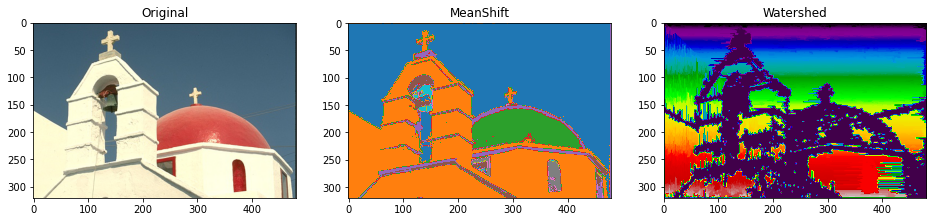

In [6]:
p2 = plt.imread("imgQ42.jpg")
ms2 = mean_shift("imgQ42.jpg")
ws2 = water_shed("imgQ42.jpg")
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.gca().set_title('Original')
plt.imshow(p2)
plt.subplot(132)
plt.gca().set_title('MeanShift')
plt.imshow(ms2, cmap="tab10")
plt.subplot(133)
plt.gca().set_title('Watershed')
plt.imshow(ws2, cmap=plt.cm.nipy_spectral)
plt.savefig("2.png")
plt.show()

The output is also saved to file 1.png and 2.png.